In [54]:
!pip install category-encoders
!pip install dash

  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100477 sha256=951f411a8c954cc59bc38d37d34d1e0437193f50a950c0d85902e7cd9d45f84a
  Stored in directory: c:\users\dcon7\appdata\local\pip\cache\wheels\56\e4\21\8a1190a7c31f3aa3f8834b05126ded8bf105b8fd11fad1806e
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738982 sha256=da0aaa1c15655c392b07edd82c1bc8efbf140886fdbcb5f4801b4a5237286d6f
  Stored in directory: c:\users\dcon7\appdata\local\pip\cache\wheels\08\ae\6a\0f4a0ee8fa216ebf1f2e57277693a20d80e8a2cfe549f66d86
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319751 sha256=9219faae09d5d7c01b586c0d4b85b166e01088afd540a86dcc3c120f1c3c439e
  Stored in directory: c:\users\dcon7\appdata\local\pip\cache\wheels\12\fe\5a\d0f2f657ee34cef5cc3fced1d8992994fac1ca6232a03c6c03
  Created wheel for dash-table: filename=dash_table-4.12.0-py3-none-any.whl size=1837669 sha256=53b11d01

In [83]:
import pandas as pd
import numpy as np

data = r'C:\Users\dcon7\OneDrive\Desktop\Homework\Assignment\BuildProjects\Toronto_Metro_Delay\Toronto-Subway-Delay-Jan-2014-Jun-2021.csv'

df = pd.read_csv(data)

In [33]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [86]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
def wrangle(df):
    
    # Set the Index
    df = df.set_index('Date')
    
    # Change Day to Day_of_Week
    df = df.rename(columns = {'Day':'Day of Week'})
    
    # Drop NaN values
    df = df.dropna()
    
    return df

In [85]:
df = wrangle(df)

df.head()

,Time,Day of Week,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174


In [75]:
df['Min Gap'].value_counts()

0      66634
6       7957
8       7416
7       5449
10      5114
       ...  
600        1
129        1
343        1
194        1
191        1
Name: Min Gap, Length: 195, dtype: int64

In [61]:
target = 'Line'

X = df.drop(columns = target)
y = df[target]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [90]:
y_train.value_counts(normalize = True)

YU              0.468665
BD              0.460065
SRT             0.035680
SHP             0.035008
B/D             0.000392
YUS             0.000067
YU/BD           0.000045
66              0.000011
9 BELLAMY       0.000011
60              0.000011
31 GREENWOOD    0.000011
22 COXWELL      0.000011
29 DUFFERIN     0.000011
RT              0.000011
Name: Line, dtype: float64

In [63]:
baseline_acc = y_train.value_counts(normalize = True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.46866530785943067


In [64]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
model_rf = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators = 3, n_jobs = -1)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Time', 'Day', 'Station', 'Code',
                                      'Bound'],
                                mapping=[{'col': 'Time',
                                          'data_type': dtype('O'),
                                          'mapping': 01:11       1
16:39       2
17:18       3
11:25       4
14:00       5
         ... 
04:30    1413
03:04    1414
03:36    1415
05:19    1416
NaN        -2
Length: 1417, dtype: int64},
                                         {'col': 'Day', 'data_type': dtype('O'),
                                          'mapping': Thursday     1
Friday       2
Sunday       3
Saturday     4
Tuesday      5
Monday       6
Wednesda...
                                          'data_type': dtype('O'),
                                          'mapping': SUDP       1
MUNOA      2
MUIRS      3
MUSC       4
SUUT       5
        ... 
PUDCS    197
PUSIC    198
PUEME    199
PRST     200

In [68]:
model_gbc = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(n_estimators = 3, max_depth = 3, max_features = 5, random_state = 714)
)


model_gbc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Time', 'Day', 'Station', 'Code',
                                      'Bound'],
                                mapping=[{'col': 'Time',
                                          'data_type': dtype('O'),
                                          'mapping': 01:11       1
16:39       2
17:18       3
11:25       4
14:00       5
         ... 
04:30    1413
03:04    1414
03:36    1415
05:19    1416
NaN        -2
Length: 1417, dtype: int64},
                                         {'col': 'Day', 'data_type': dtype('O'),
                                          'mapping': Thursday     1
Friday       2
Sunday       3
Saturday     4
Tuesday      5
Monday       6
Wednesda...
                                          'data_type': dtype('O'),
                                          'mapping': SUDP       1
MUNOA      2
MUIRS      3
MUSC       4
SUUT       5
        ... 
PUDCS    197
PUSIC    198
PUEME    199
PRST     200

In [67]:
model_xgb = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier()
)


model_xgb.fit(X_train, y_train)

F:\WritingSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Time', 'Day', 'Station', 'Code',
                                      'Bound'],
                                mapping=[{'col': 'Time',
                                          'data_type': dtype('O'),
                                          'mapping': 01:11       1
16:39       2
17:18       3
11:25       4
14:00       5
         ... 
04:30    1413
03:04    1414
03:36    1415
05:19    1416
NaN        -2
Length: 1417, dtype: int64},
                                         {'col': 'Day', 'data_type': dtype('O'),
                                          'mapping': Thursday     1
Friday       2
Sunday       3
Saturday     4
Tuesday      5
Monday       6
Wednesda...
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weigh

In [71]:
print('Random Forest Training Score:', model_rf.score(X_train, y_train))
print('Random Forest Validation Score:', model_rf.score(X_val, y_val))
print('------------------------------------------------')
print('Gradient Boosting Training Score:', model_gbc.score(X_train, y_train))
print('Gradient Boosting Validation Score:', model_gbc.score(X_val, y_val))
print('------------------------------------------------')
print('XGBClassifier Training Score:', model_xgb.score(X_train, y_train))
print('XGBClassifier Validation Score:', model_xgb.score(X_val, y_val))

Random Forest Training Score: 0.9987009205545725
Random Forest Validation Score: 0.990637878516395
------------------------------------------------
Gradient Boosting Training Score: 0.9764821824534683
Gradient Boosting Validation Score: 0.9737054291345637
------------------------------------------------
XGBClassifier Training Score: 0.9997872197460076
XGBClassifier Validation Score: 0.9965955921877799


Text(0.5, 1.0, 'XGBoost Confusion Matrix')

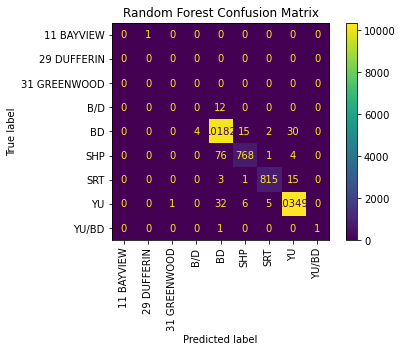

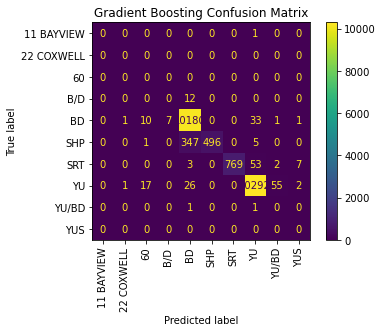

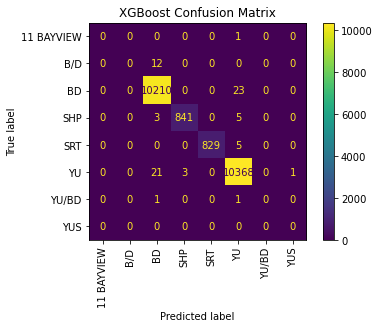

In [96]:
from sklearn.metrics import plot_confusion_matrix

# Create confusion matrixes
rf_cm = plot_confusion_matrix(model_rf, X_val, y_val, values_format = '.0f', xticks_rotation = 'vertical')
gbc_cm = plot_confusion_matrix(model_gbc, X_val, y_val, values_format = '.0f', xticks_rotation = 'vertical')
xgb_cm = plot_confusion_matrix(model_xgb, X_val, y_val, values_format = '.0f', xticks_rotation = 'vertical')

# Add titles to confusion matrixes
rf_cm.ax_.set_title('Random Forest Confusion Matrix')
gbc_cm.ax_.set_title('Gradient Boosting Confusion Matrix')
xgb_cm.ax_.set_title('XGBoost Confusion Matrix')